# Ejemplo con información de ventas de celulares

https://www.kaggle.com/datasets/iabhishekofficial/mobile-price-classification?select=train.csv

### MOBILE PRICE CLASSIFICATION

Dataset as 21 features and 2000 entries. The meanings of the features are given below.

- battery_power: Total energy a battery can store in one time measured in mAh
- blue: Has bluetooth or not
- clock_speed: speed at which microprocessor executes instructions
- dual_sim: Has dual sim support or not
- fc: Front Camera mega pixels
- four_g: Has 4G or not
- int_memory: Internal Memory in Gigabytes
- m_dep: Mobile Depth in cm
- mobile_wt: Weight of mobile phone
- n_cores: Number of cores of processor
- pc: Primary Camera mega pixels
- px_height: Pixel Resolution Height
- px_width: Pixel Resolution Width
- ram: Random Access Memory in Mega Byte
- sc_h: Screen Height of mobile in cm
- sc_w: Screen Width of mobile in cm
- talk_time: longest time that a single battery charge will last when you are
- three_g: Has 3G or not
- touch_screen: Has touch screen or not
- wifi: Has wifi or not
- price_range: This is the target variable with value of 0(low cost), 1(medium cost), 2(high cost) and 3(very high cost).

In [22]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [23]:
df = pd.read_csv('train.csv')
df.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


In [24]:
df.shape

(2000, 21)

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

No hay valores nulos

In [26]:
df.describe()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
count,2000.000000,2000.0000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,...,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1238.518500,0.4950,1.522250,0.509500,4.309500,0.521500,32.046500,0.501750,140.249000,4.520500,...,645.108000,1251.515500,2124.213000,12.306500,5.767000,11.011000,0.761500,0.503000,0.507000,1.500000
std,439.418206,0.5001,0.816004,0.500035,4.341444,0.499662,18.145715,0.288416,35.399655,2.287837,...,443.780811,432.199447,1084.732044,4.213245,4.356398,5.463955,0.426273,0.500116,0.500076,1.118314
min,501.000000,0.0000,0.500000,0.000000,0.000000,0.000000,2.000000,0.100000,80.000000,1.000000,...,0.000000,500.000000,256.000000,5.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000
25%,851.750000,0.0000,0.700000,0.000000,1.000000,0.000000,16.000000,0.200000,109.000000,3.000000,...,282.750000,874.750000,1207.500000,9.000000,2.000000,6.000000,1.000000,0.000000,0.000000,0.750000
50%,1226.000000,0.0000,1.500000,1.000000,3.000000,1.000000,32.000000,0.500000,141.000000,4.000000,...,564.000000,1247.000000,2146.500000,12.000000,5.000000,11.000000,1.000000,1.000000,1.000000,1.500000
75%,1615.250000,1.0000,2.200000,1.000000,7.000000,1.000000,48.000000,0.800000,170.000000,7.000000,...,947.250000,1633.000000,3064.500000,16.000000,9.000000,16.000000,1.000000,1.000000,1.000000,2.250000
max,1998.000000,1.0000,3.000000,1.000000,19.000000,1.000000,64.000000,1.000000,200.000000,8.000000,...,1960.000000,1998.000000,3998.000000,19.000000,18.000000,20.000000,1.000000,1.000000,1.000000,3.000000


In [27]:
pd.options.display.float_format = '{:.2f}'.format

In [28]:
df.var()

battery_power    193088.36
blue                  0.25
clock_speed           0.67
dual_sim              0.25
fc                   18.85
four_g                0.25
int_memory          329.27
m_dep                 0.08
mobile_wt          1253.14
n_cores               5.23
pc                   36.78
px_height        196941.41
px_width         186796.36
ram             1176643.61
sc_h                 17.75
sc_w                 18.98
talk_time            29.85
three_g               0.18
touch_screen          0.25
wifi                  0.25
price_range           1.25
dtype: float64

El target que nos interesa

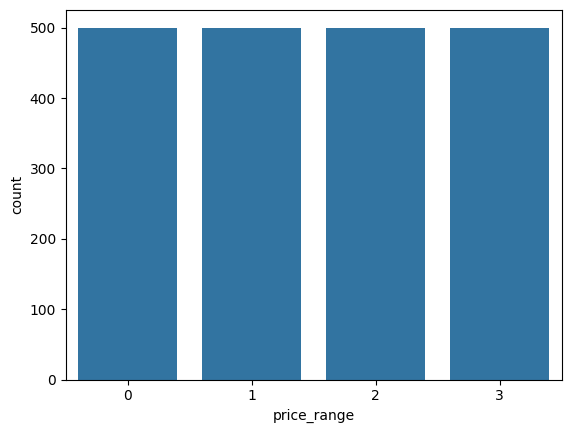

In [29]:
sns.countplot(x='price_range',data=df)
plt.show()

Matriz de correlacion

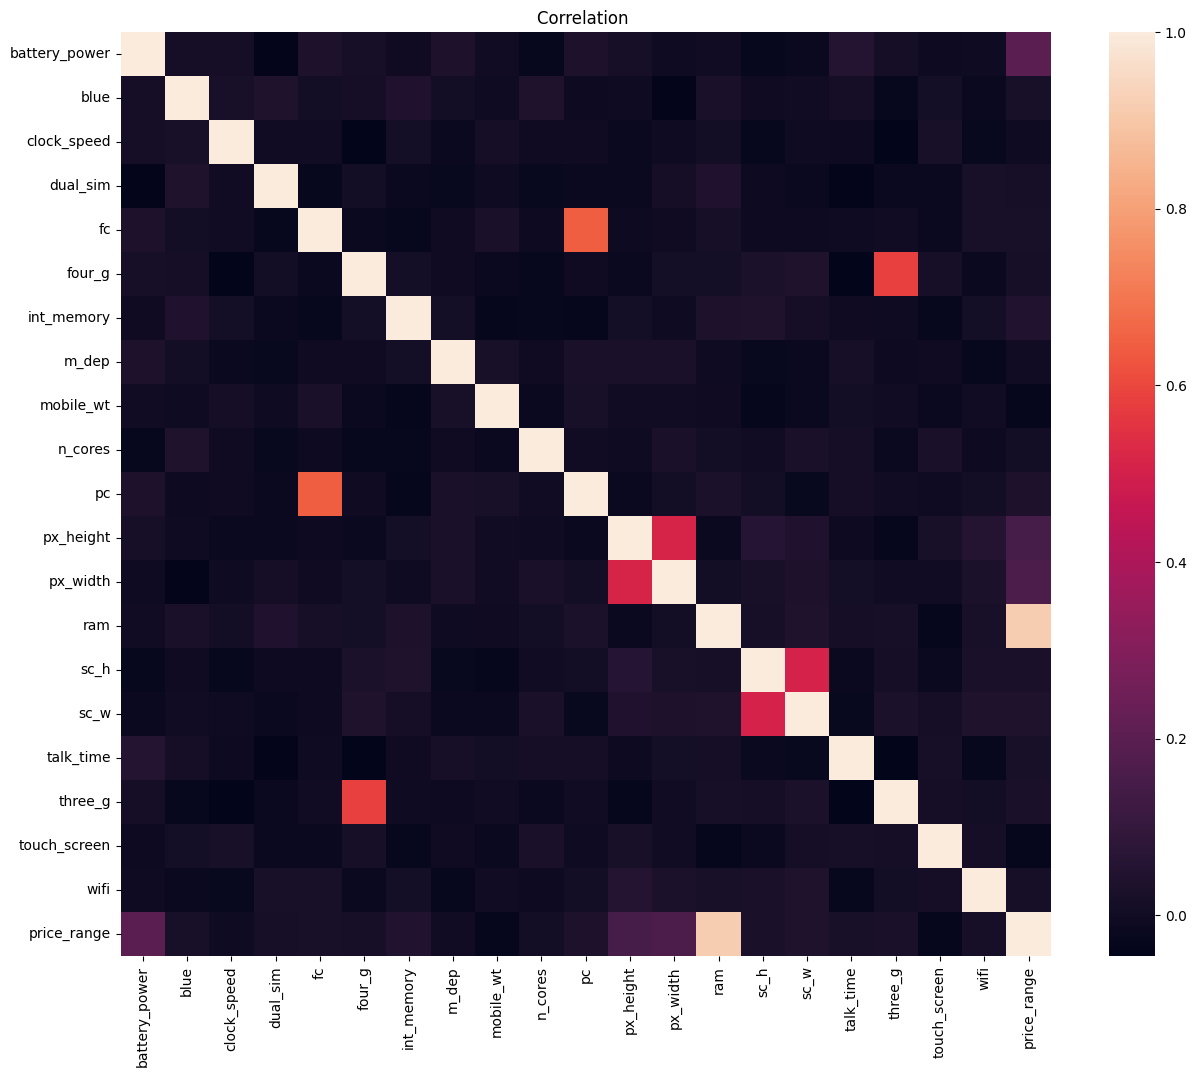

In [30]:
fig = plt.figure(figsize=(15,12))
r = sns.heatmap(df.corr())
r.set_title("Correlation ")
plt.show()

La grafica sugiere que las variables mas correlacionadas con nuestra variable objetivo son ram, battery_power (y tal vez px_width, y px_height).

Exploracion visual


Visualizaciones para la columna:  battery_power


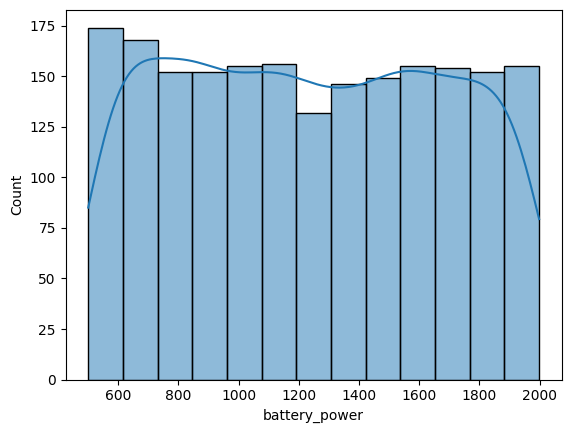

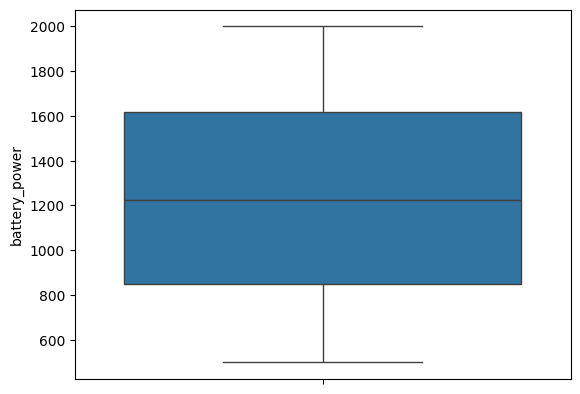


Visualizaciones para la columna:  blue


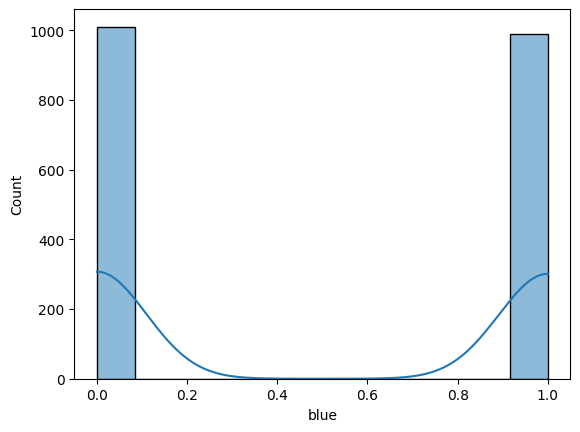

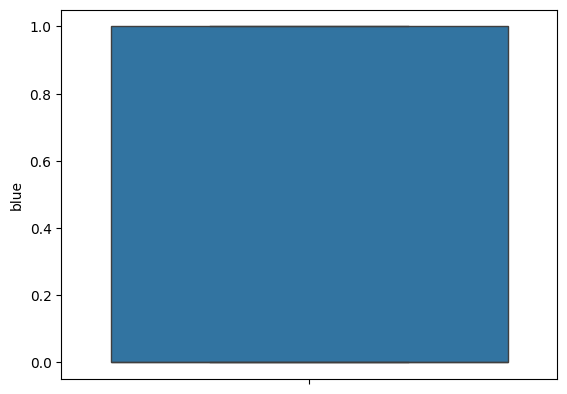


Visualizaciones para la columna:  clock_speed


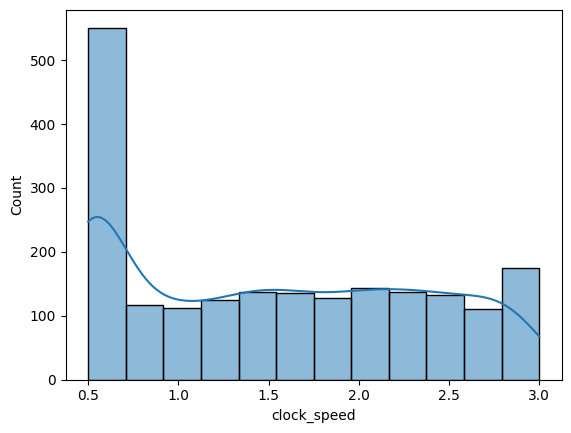

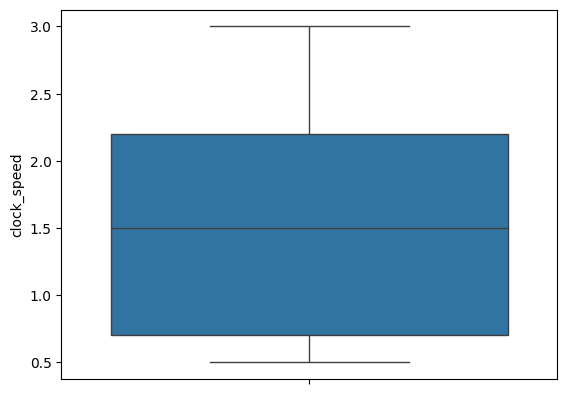


Visualizaciones para la columna:  dual_sim


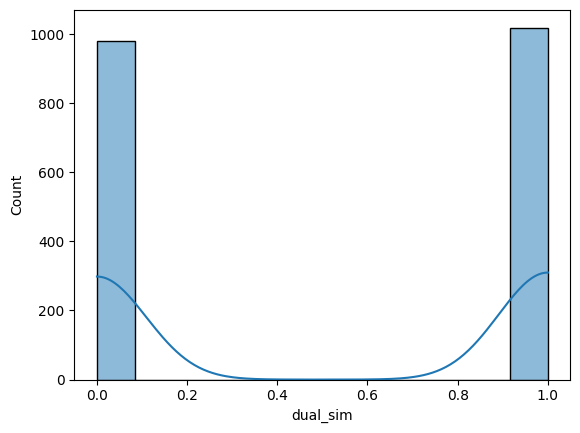

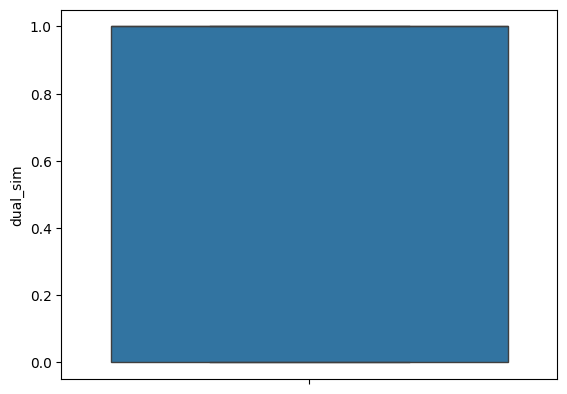


Visualizaciones para la columna:  fc


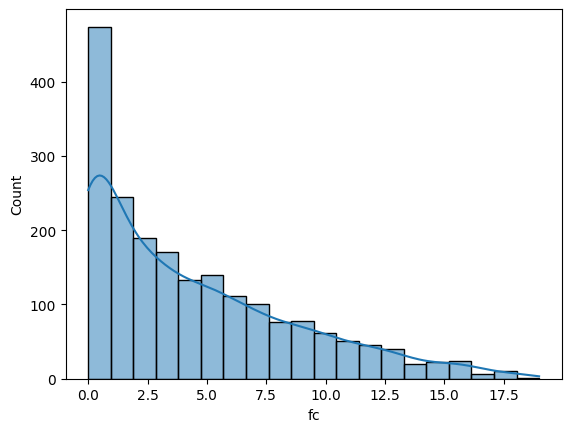

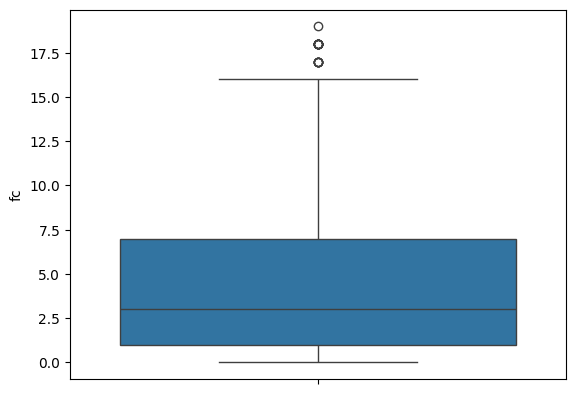


Visualizaciones para la columna:  four_g


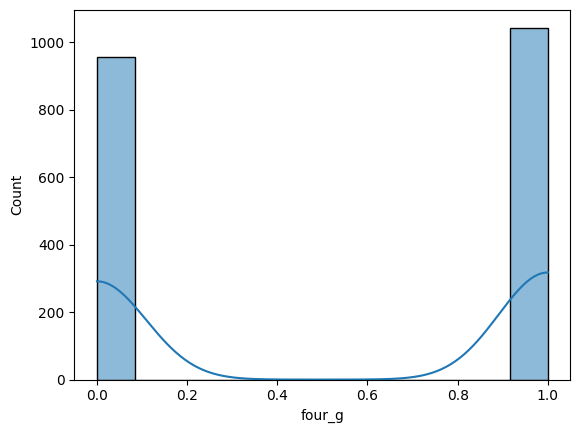

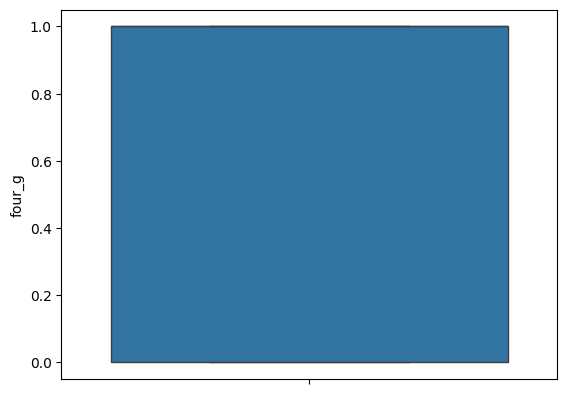


Visualizaciones para la columna:  int_memory


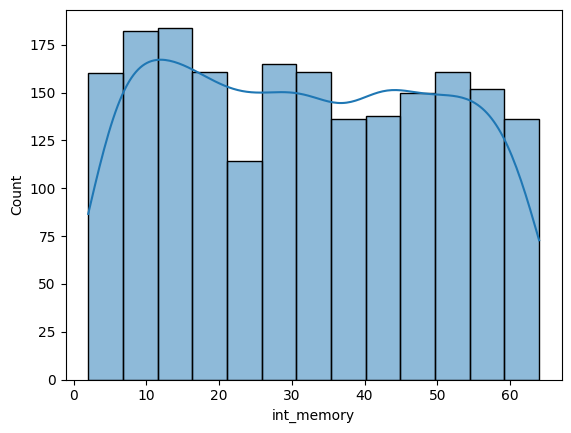

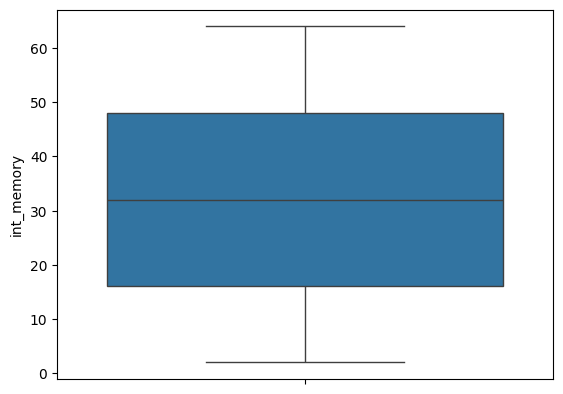


Visualizaciones para la columna:  m_dep


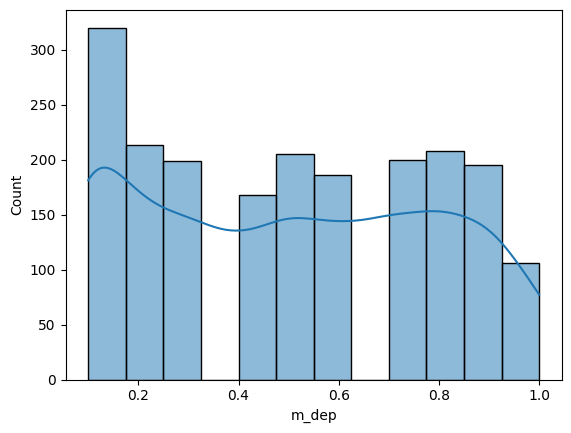

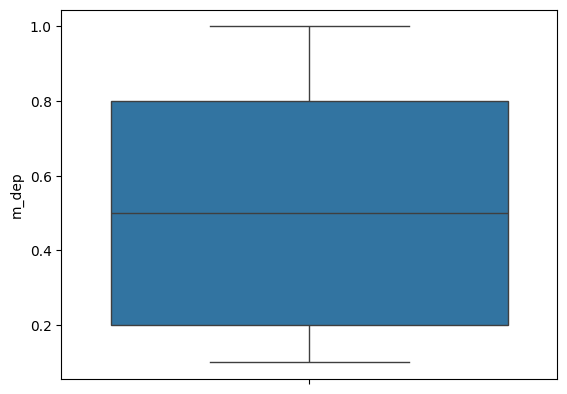


Visualizaciones para la columna:  mobile_wt


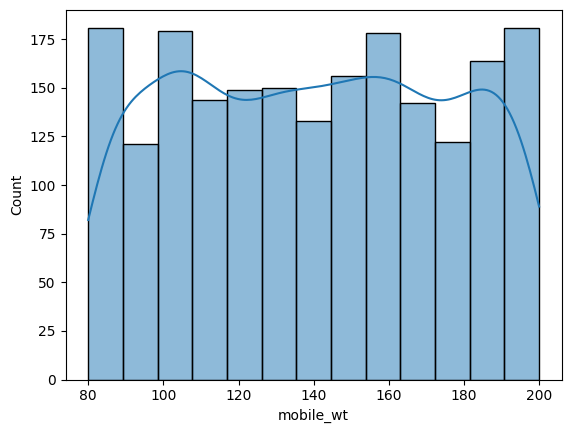

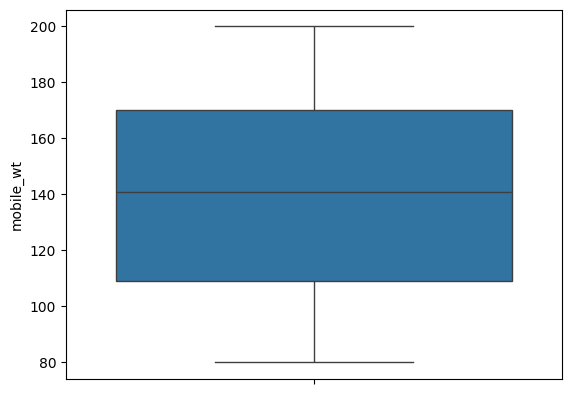


Visualizaciones para la columna:  n_cores


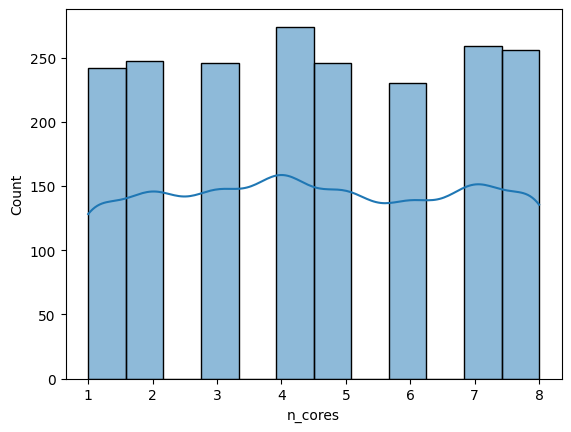

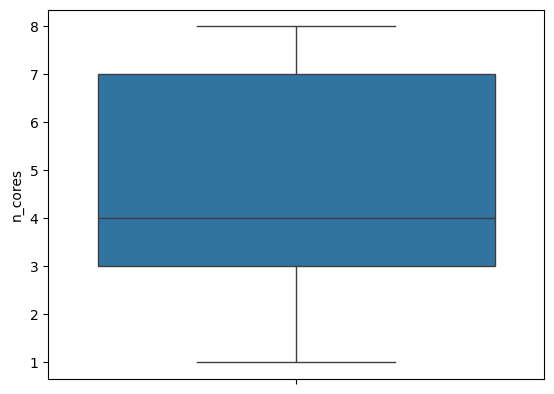


Visualizaciones para la columna:  pc


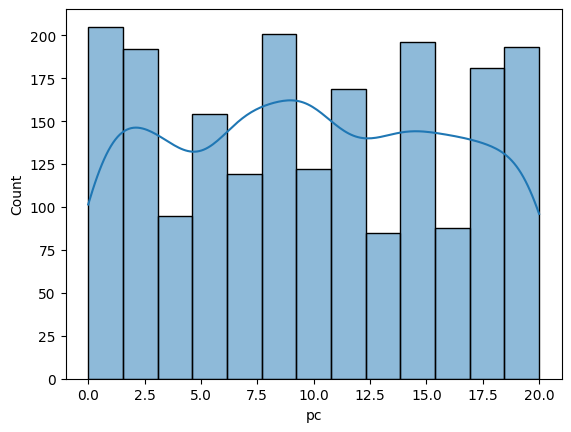

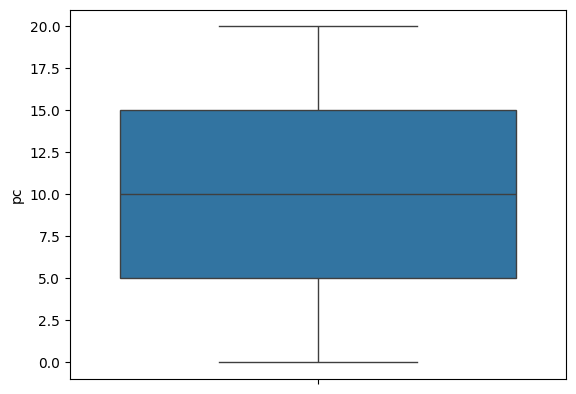


Visualizaciones para la columna:  px_height


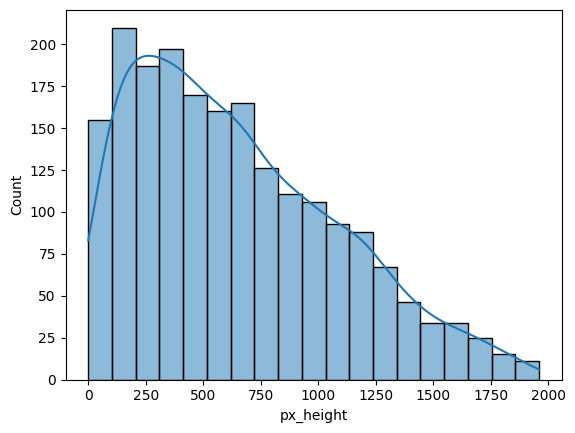

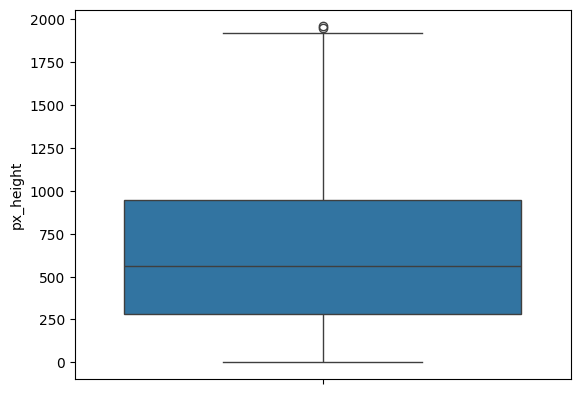


Visualizaciones para la columna:  px_width


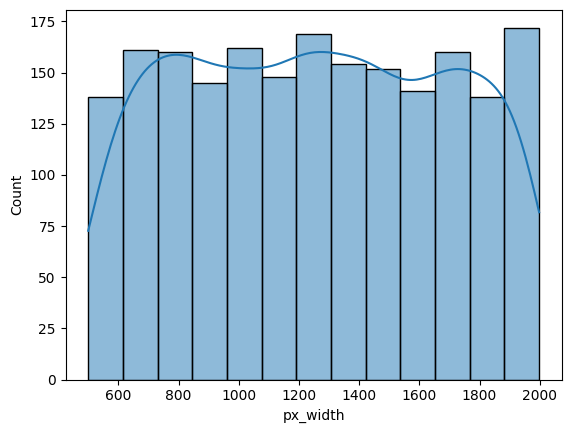

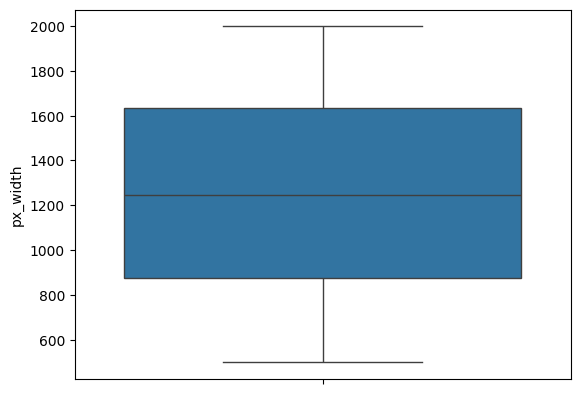


Visualizaciones para la columna:  ram


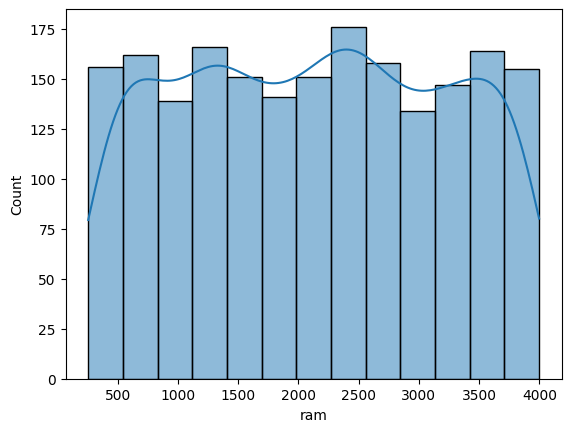

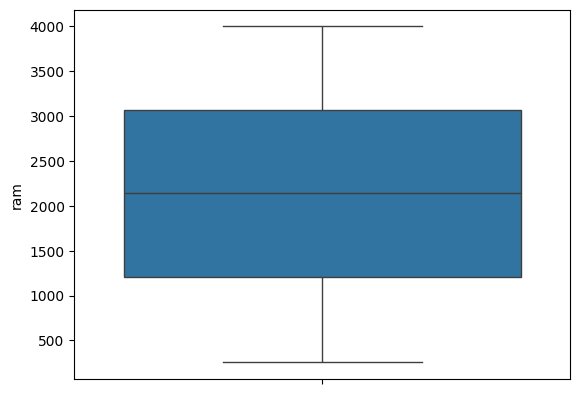


Visualizaciones para la columna:  sc_h


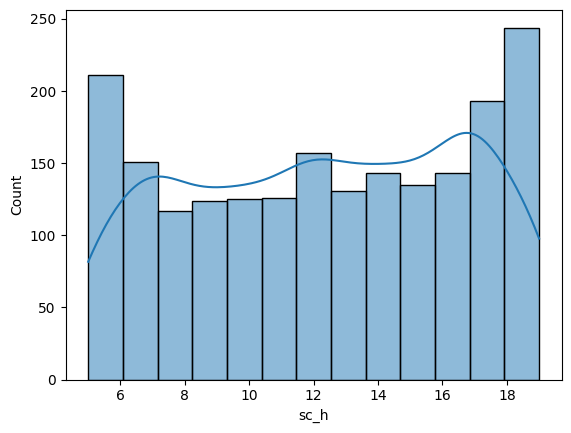

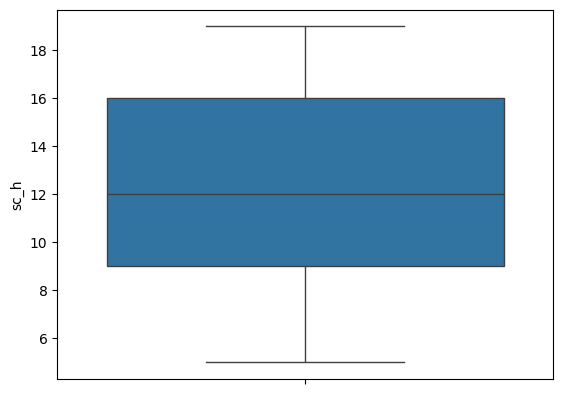


Visualizaciones para la columna:  sc_w


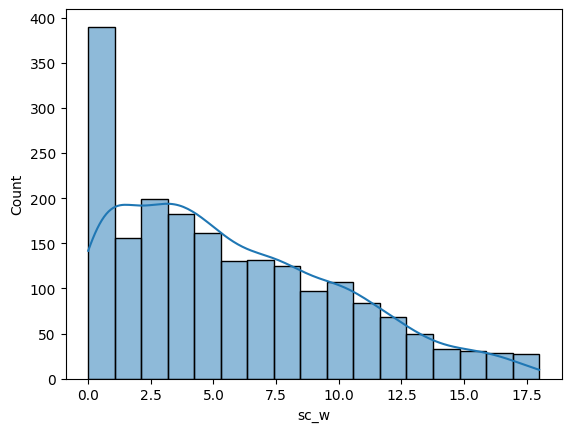

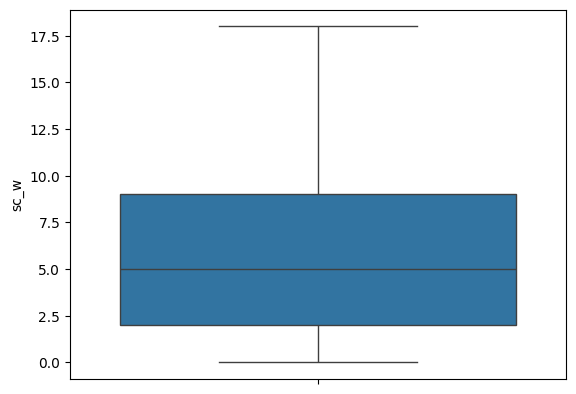


Visualizaciones para la columna:  talk_time


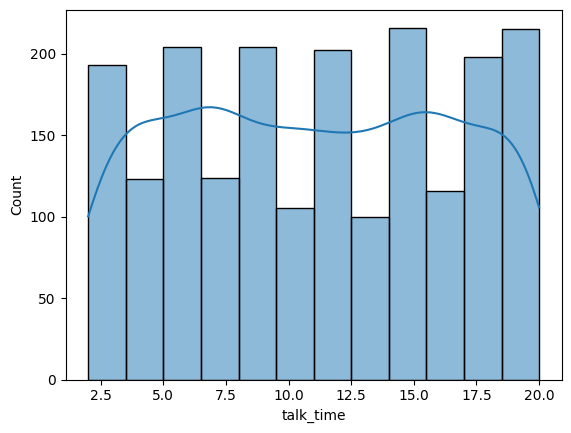

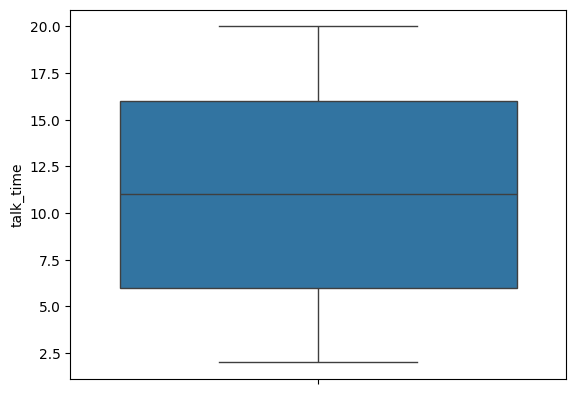


Visualizaciones para la columna:  three_g


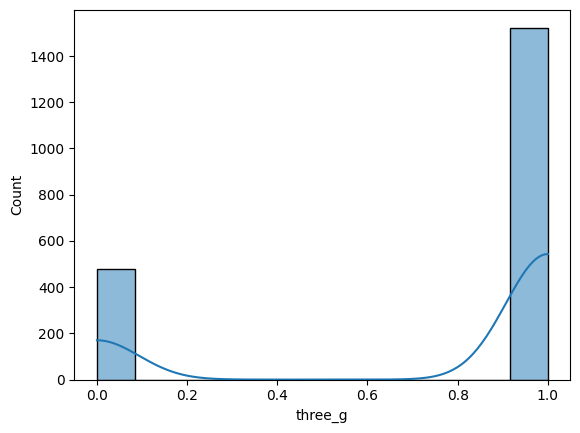

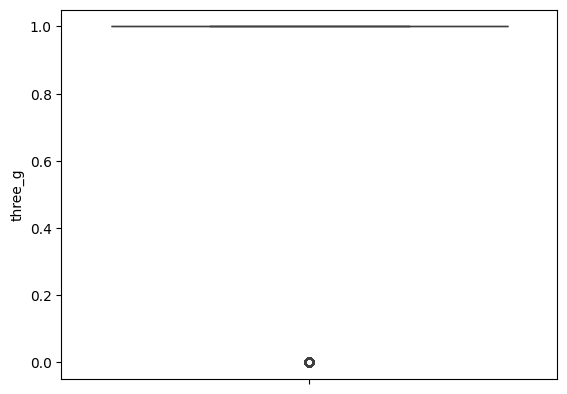


Visualizaciones para la columna:  touch_screen


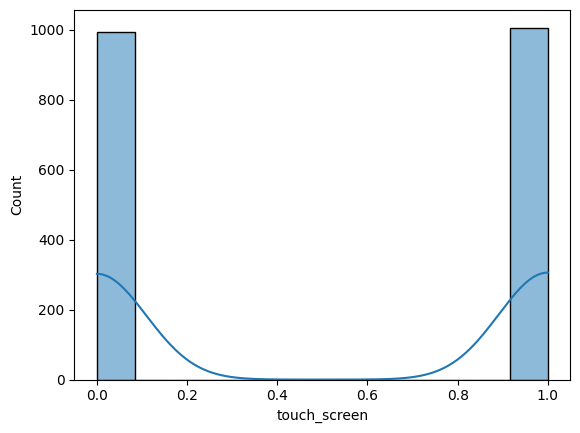

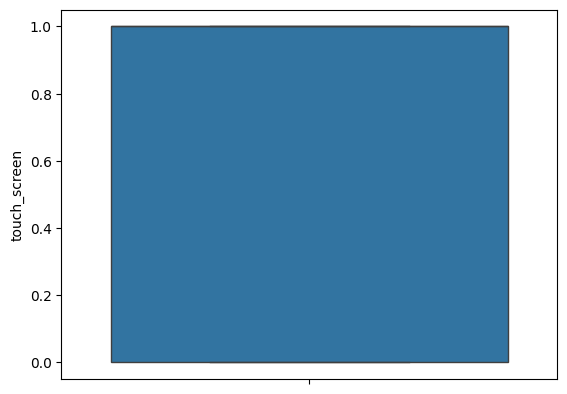


Visualizaciones para la columna:  wifi


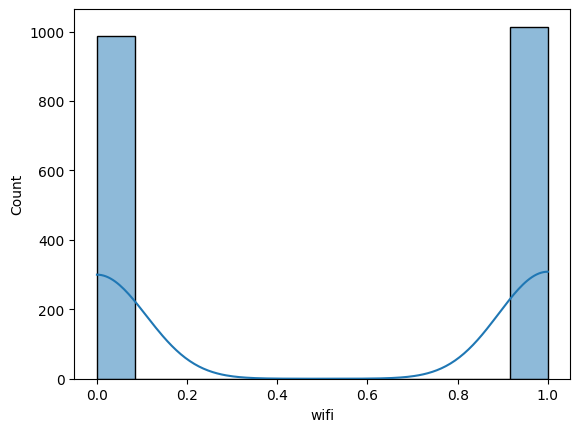

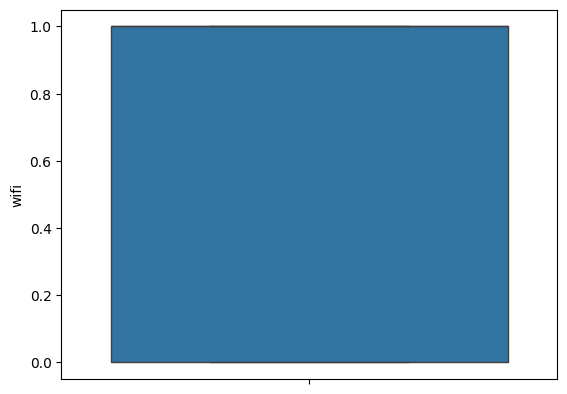


Visualizaciones para la columna:  price_range


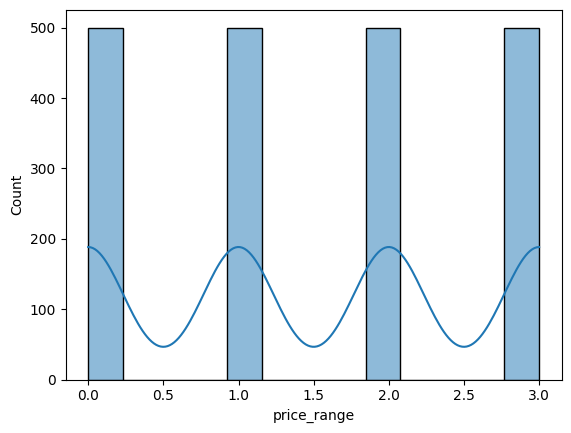

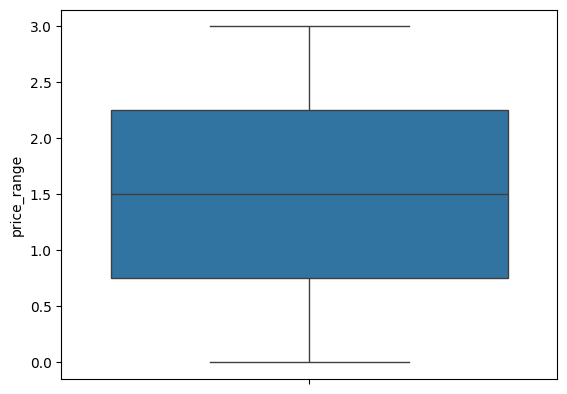

In [31]:
#Columnas numéricas
for col in df.columns:
    print('\nVisualizaciones para la columna: ', col)
    sns.histplot(df[col],kde=True) # Mostrando la distribución de los datos
    plt.show()
    sns.boxplot(df[col]) # para ver si hay outliers
    plt.show()

Estandarizando

In [32]:
X = df.loc[:,['ram', 'battery_power']]
X.head()

,ram,battery_power
0,2549,842
1,2631,1021
2,2603,563
3,2769,615
4,1411,1821


In [33]:
y = df[['price_range']]
y.head()

,price_range
0,1
1,2
2,2
3,2
4,1


In [34]:
from sklearn.model_selection import train_test_split

In [35]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y)
# stratify=y para que se mantenga la proporción de las clases en el conjunto de entrenamiento y test

In [36]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((1400, 2), (1400, 1), (600, 2), (600, 1))

In [37]:
from sklearn.preprocessing import StandardScaler

In [38]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)
print('Vemos las primeras 5')
print(X_train_std[:5])
print('Y las últimas 5')
print(X_train_std[-5:])

Vemos las primeras 5
[[ 1.67513427  0.96382952]
 [-0.42238344 -0.02283422]
 [-0.08685394 -0.38801321]
 [-1.59123618 -1.41323622]
 [-1.39505227  0.88897917]]
Y las últimas 5
[[ 0.4631944   1.17930781]
 [-0.63048506  0.51926379]
 [ 1.07649831 -0.26326262]
 [ 0.91148381 -0.7554604 ]
 [-0.60848313  0.21078961]]


### Conclusiones
- En la visualización de las columnas numéricas, se observa que no hay datos faltantes, ni datos categóricos.
Se observa que la columna de ram tiene una correlación alta con la columna de price_range.
- Se observa que la columna de battery_power tiene una correlación baja con la columna de price_range.
- Se observa que la columna de ram tiene una alta varianza.
- Se observa que la columna de battery_power tiene una alta varianza.
- Se observa que la columna de price_range tiene una distribución uniforme.
- Se observa que la columna de ram tiene una distribución uniforme.
- Se observa que la columna de battery_power tiene una distribución uniforme.
- Se observa que la columna de price_range no tiene outliers.
- Se observa que la columna de ram tiene no outliers.
- Se observa que la columna de battery_power no tiene outliers.

- Se sugiere que se utilicen las columnas de ram y battery_power para predecir la columna de price_range.
- Se sugiere que se utilice un modelo de clasificación.
- La reducción de dimensionalidad no es necesaria.